In [1]:
import pandas as pd
import matplotlib.pyplot as plt

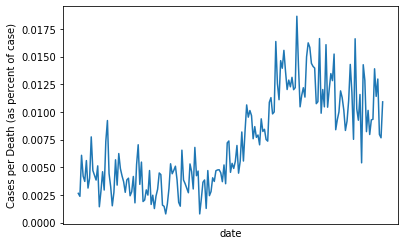

In [4]:
cases_mas = pd.read_csv('epidemic/cases_malaysia.csv')
death_mas = pd.read_csv('epidemic/deaths_malaysia.csv')

cases_mas = cases_mas.drop(labels=0, axis=0)
cases_mas = cases_mas.reset_index()

deaths = death_mas['deaths_new']
cases = cases_mas['cases_new']

DpC = deaths/cases

plt.plot(death_mas['date'][320:], DpC[320:])

plt.xlabel('date')
plt.ylabel('Cases per Death (as percent of case)')
plt.xticks([])
plt.show()

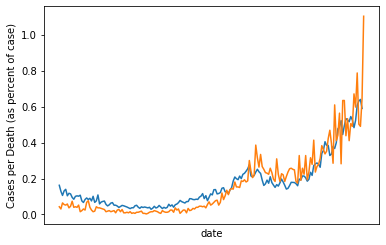

In [9]:
deaths = death_mas['deaths_new']
cases = cases_mas['cases_new']
malaysia_population = 32657400
plt.plot(cases_mas['date'][320:], (1000/malaysia_population)*cases[320:])
# plt.plot(death_mas['date'][320:], DpC[320:])
plt.plot(death_mas['date'][320:], (100000/malaysia_population)*deaths[320:])
plt.xlabel('date')
plt.ylabel('Cases per Death (as percent of case)')
plt.xticks([])
plt.show()

In [11]:
icu = pd.read_csv('epidemic/icu.csv')
# icu_covid = icu['icu_covid']
icu_pivoted = icu.pivot(index='date', columns='state', values='icu_covid').reset_index()


In [30]:
def sumStates(row):

    return row[1:].dropna().sum()

    # print(row[1:].dropna().sum())
    # for i in row:
    #     print(len(row))


In [31]:
icu_pivoted['Malaysia'] = icu_pivoted.apply(sumStates, axis=1)


In [33]:
icu_pivoted_available_bed = icu.pivot(index='date', columns='state', values='bed_icu_covid').reset_index()

In [34]:
icu_pivoted['icu_available_covid'] = icu_pivoted_available_bed.apply(sumStates, axis=1)

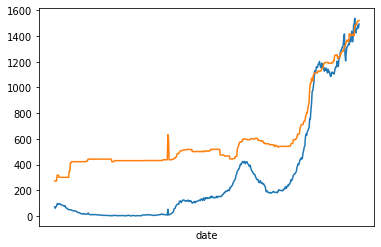

In [36]:
plt.plot(icu_pivoted['date'], icu_pivoted['Malaysia'])
plt.plot(icu_pivoted['date'], icu_pivoted['icu_available_covid'])

plt.xlabel('date')
plt.ylabel('')
plt.xticks([])
plt.show()

In [37]:
icu_pivoted_total_bed = icu.pivot(index='date', columns='state', values='bed_icu_total').reset_index()
icu_pivoted['icu_total'] = icu_pivoted_total_bed.apply(sumStates, axis=1)

In [39]:
total_vent = icu.pivot(index='date', columns='state', values='vent').reset_index()
icu_pivoted['vent'] = total_vent.apply(sumStates, axis=1)

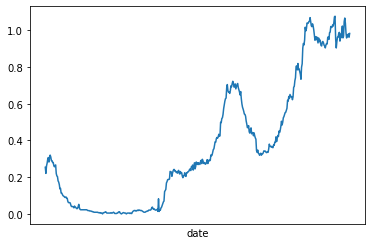

In [42]:
# plt.plot(icu_pivoted['date'], icu_pivoted['Malaysia'])
# plt.plot(icu_pivoted['date'], icu_pivoted['icu_available_covid'])
# plt.plot(icu_pivoted['date'], icu_pivoted['icu_total'])
# plt.plot(icu_pivoted['date'], icu_pivoted['vent'])


plt.plot(icu_pivoted['date'], icu_pivoted['Malaysia']/icu_pivoted['icu_available_covid'])
# plt.plot(icu_pivoted['date'], icu_pivoted['icu_available_covid'])
# plt.plot(icu_pivoted['date'], icu_pivoted['icu_total'])
# plt.plot(icu_pivoted['date'], icu_pivoted['vent']/icu_pivoted['Malaysia'])

plt.xlabel('date')
plt.ylabel('')
plt.xticks([])
plt.show()